In [102]:
#Importing labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.simplefilter(action='ignore',category=UserWarning)

In [47]:
#Reading data 
bp=pd.read_csv(r'Patient_with_abnormal_bloodpressure.csv')

In [48]:
bp.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [49]:
bp.shape

(2000, 15)

## EDA on Dataset

### Data Cleaning

In [50]:
bp.isnull().sum()/bp.shape[0]*100

Patient_Number                    0.0
Blood_Pressure_Abnormality        0.0
Level_of_Hemoglobin               0.0
Genetic_Pedigree_Coefficient      4.6
Age                               0.0
BMI                               0.0
Sex                               0.0
Pregnancy                        77.9
Smoking                           0.0
Physical_activity                 0.0
salt_content_in_the_diet          0.0
alcohol_consumption_per_day      12.1
Level_of_Stress                   0.0
Chronic_kidney_disease            0.0
Adrenal_and_thyroid_disorders     0.0
dtype: float64

#### The isnull() function is used to check the null values which are present in the dataset ,here *Genetic_Pedigree_Coefficient*, *Pregnancy* and *alcohol_consumption_per_day* columns have 4.6, 77.9 and 12.1 percent null value.The null value of *Pregnancy* column is more than 50% so we need to drop the column.

In [51]:
bp.drop(columns=['Patient_Number','Pregnancy'],axis=1,inplace=True)

In [52]:
bp.alcohol_consumption_per_day.value_counts()

alcohol_consumption_per_day
253.0    11
401.0    10
302.0    10
144.0    10
485.0     9
         ..
21.0      1
406.0     1
346.0     1
244.0     1
326.0     1
Name: count, Length: 488, dtype: int64

##### *alcohol_consumption_per_day* contains the continues values so we need to take mean() to fill null values

In [53]:
bp.alcohol_consumption_per_day=bp.alcohol_consumption_per_day.fillna(bp.alcohol_consumption_per_day.mean())

In [54]:
##### *Genetic_Pedigree_Coefficient* contains the continues values so we need to take mean() to fill null values

In [55]:
bp.Genetic_Pedigree_Coefficient=bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.mean())

In [56]:
bp.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [57]:
bp.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Smoking',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [58]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Smoking                        2000 non-null   int64  
 7   Physical_activity              2000 non-null   int64  
 8   salt_content_in_the_diet       2000 non-null   int64  
 9   alcohol_consumption_per_day    2000 non-null   float64
 10  Level_of_Stress                2000 non-null   int64  
 11  Chronic_kidney_disease         2000 non-null   int64  
 12  Adrenal_and_thyroid_disorders  2000 non-null   i

### Univariate Analysis

#### Blood_Pressure_Abnormality is a target variable.

In [59]:
bpa=bp['Blood_Pressure_Abnormality'].value_counts()

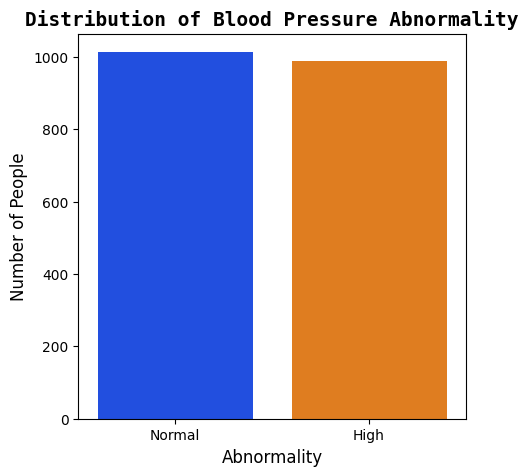

In [60]:
plt.figure(figsize=(5, 5))
sns.barplot(x=bpa.index, y=bpa.values, palette='bright')  # Corrected the `x` and `y` arguments
plt.title('Distribution of Blood Pressure Abnormality', fontdict={'fontname': 'Monospace', 'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Abnormality', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Normal', 'High'], fontsize=10)  # Add proper labels
plt.show()

Text(0, 0.5, 'Frequency')

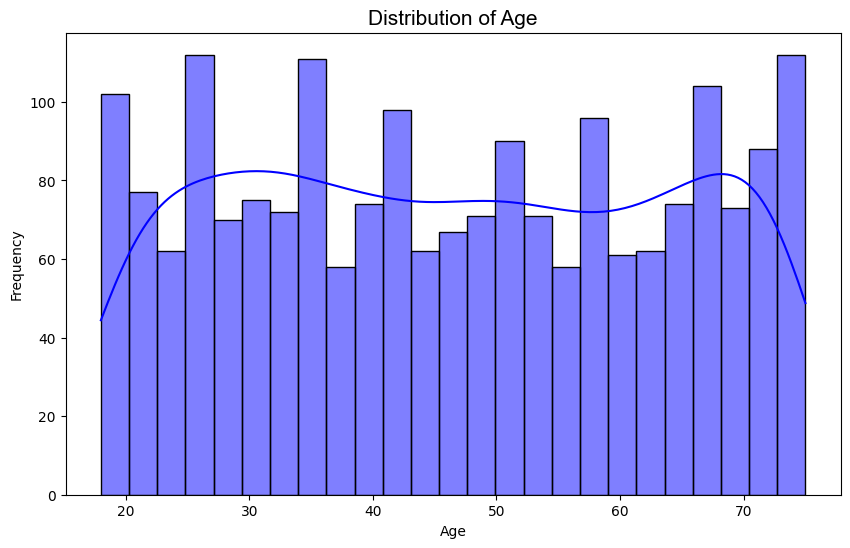

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(bp['Age'],color='blue',kde=True,bins=25)
plt.title('Distribution of Age',fontdict={'fontname':'Arial','fontsize':15})
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

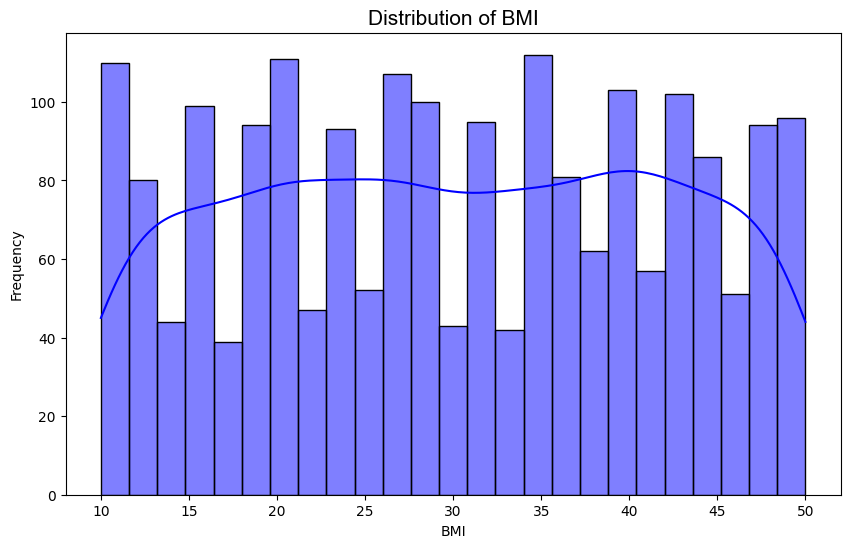

In [62]:
plt.figure(figsize=(10,6))
sns.histplot(bp['BMI'],color='blue',kde=True,bins=25)
plt.title('Distribution of BMI',fontdict={'fontname':'Arial','fontsize':15})
plt.xlabel('BMI')
plt.ylabel('Frequency')

### Bivariate Analysis

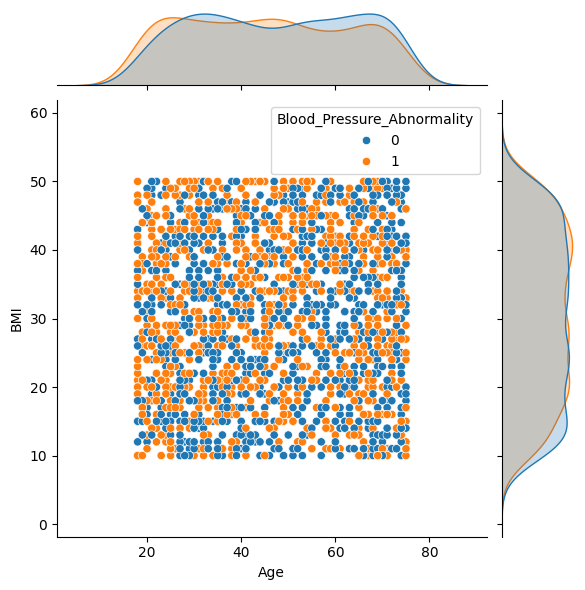

In [63]:
sns.jointplot(data=bp,x='Age',y='BMI',hue='Blood_Pressure_Abnormality')

<Axes: >

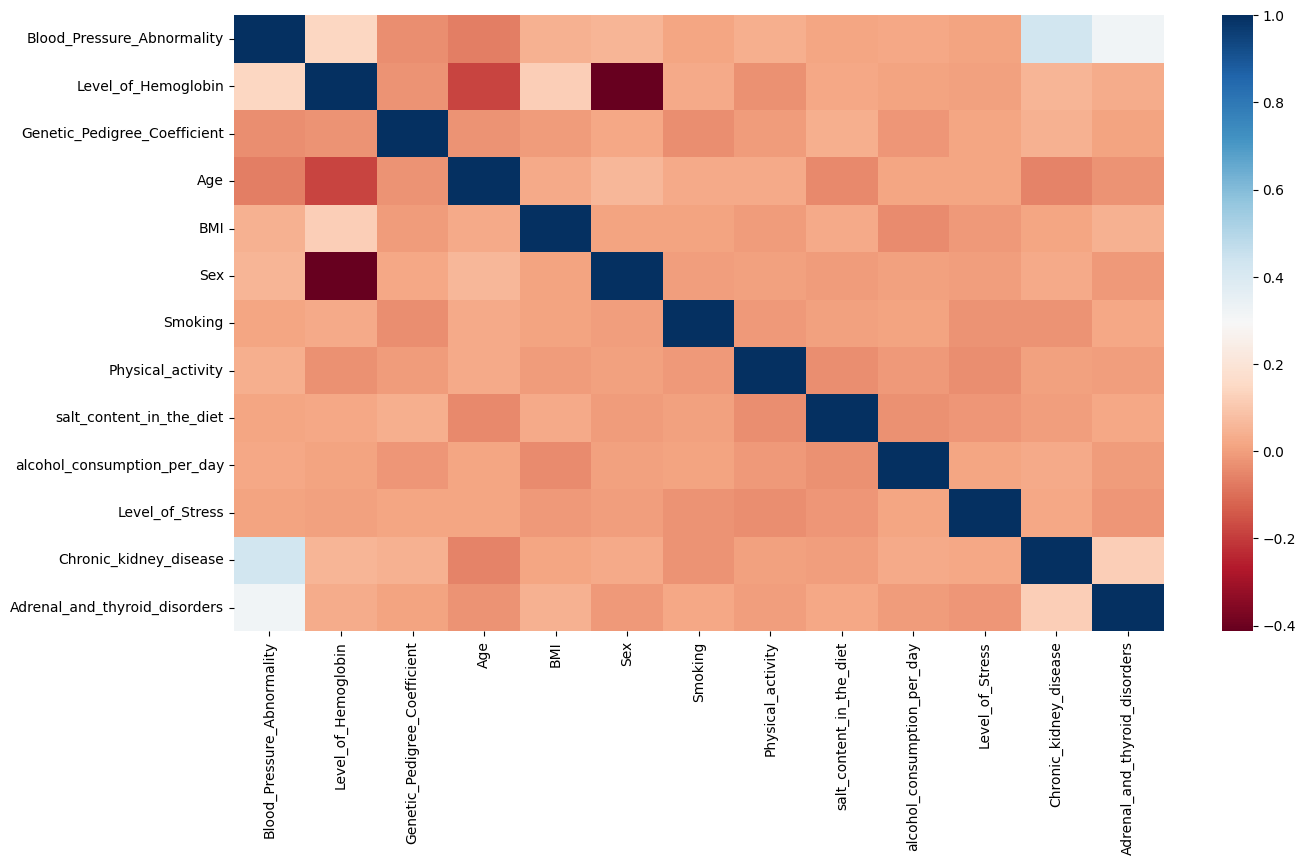

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(bp.corr(),cmap='RdBu')


## Future Selection

In [65]:
X=bp.drop('Blood_Pressure_Abnormality',axis=1)

In [66]:
Y=bp['Blood_Pressure_Abnormality']

In [67]:
from sklearn.ensemble import ExtraTreesRegressor

In [68]:
selector=ExtraTreesRegressor()

In [69]:
selector.fit(X,Y)

ExtraTreesRegressor()

In [70]:
futureimp=selector.feature_importances_

In [71]:
for index,val in enumerate(futureimp):
    print(index,round((val*100),2))

0 22.72
1 25.98
2 3.94
3 3.9
4 2.84
5 1.89
6 3.8
7 3.63
8 3.71
9 2.39
10 18.42
11 6.78


In [72]:
bp.columns

Index(['Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Smoking',
       'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [73]:
feature_imp_df=pd.DataFrame({'Feature':X.columns,'Importance':futureimp}).sort_values(by='Importance',ascending=False)

In [74]:
feature_imp_df

,Feature,Importance
1,Genetic_Pedigree_Coefficient,0.259840
0,Level_of_Hemoglobin,0.227167
10,Chronic_kidney_disease,0.184202
11,Adrenal_and_thyroid_disorders,0.067816
2,Age,0.039367
3,BMI,0.038997
6,Physical_activity,0.038031
8,alcohol_consumption_per_day,0.037147
7,salt_content_in_the_diet,0.036330
4,Sex,0.028385


In [75]:
thershold=0.05
selected_features=feature_imp_df[feature_imp_df['Importance']>thershold]['Feature']

In [76]:
print('selected_features:')
print(selected_features.tolist())

selected_features:
['Genetic_Pedigree_Coefficient', 'Level_of_Hemoglobin', 'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders']


Text(0.5, 1.0, 'Future importance using ExtraTreesRegressor')

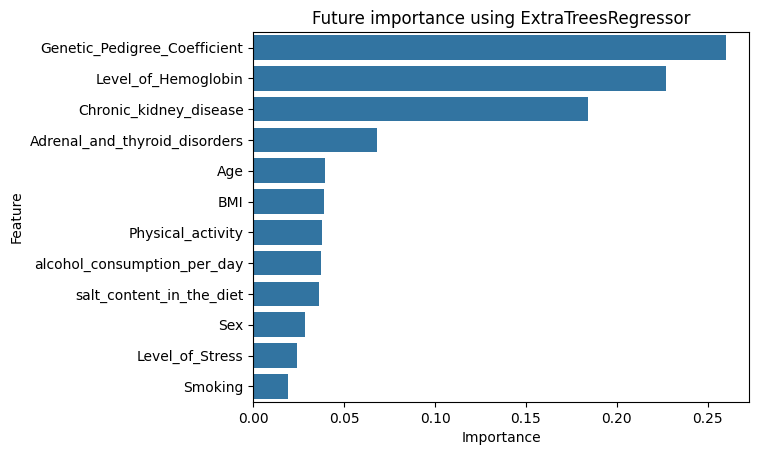

In [77]:
sns.barplot(x='Importance',y='Feature',data=feature_imp_df)
plt.title('Future importance using ExtraTreesRegressor')

In [78]:
X.drop(columns=['Age', 'BMI', 'Sex', 'Smoking','Physical_activity', 'salt_content_in_the_diet','alcohol_consumption_per_day', 'Level_of_Stress'],axis=1,inplace=True)

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [81]:
print('X_train_shape',X_train.shape)

X_train_shape (1600, 4)


## Data Modeling

#### Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#### Hyperparameter Tunning using GridSearchCV

In [83]:
#Define Parameter Grid
pram_grid={'criterion':['gini','entropy'],
           'max_depth':[3,5,10,None],'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,2,4]}

In [84]:
grid_search=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),param_grid=pram_grid,scoring='accuracy')

In [85]:
grid_search.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [86]:
print('Best Parameter:',grid_search.best_params_)


Best Parameter: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [87]:
pred_dt=grid_search.predict(X_test)

#### Confusion Matrix

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
confusion_matrix(Y_test,pred_dt)

array([[171,  23],
       [ 35, 171]], dtype=int64)

## Accuracy

In [90]:
accuracy_score(Y_test,pred_dt)*100

85.5

#### Accuracy of model is *87.75*

In [103]:
## prediction on new data
labels={0:'Normal Blood Pressure',1:'High Blood Pressure'}
input_feature=[[8.5,0.5,1,1]]
prediction=grid_search.predict(input_feature)
predicted_labels=labels[prediction[0]]
print("Predicted Category:",predicted_labels)

Predicted Category: High Blood Pressure
